### Steps:
1. Importing neccessary libraries
2. Understanding Data
3. Data visualization
4. Data Preparation (Dummy Variable creation)
5. Splitting Dataset into Training and Test Set
6. Building Model
7. Optimal Cutoff (Model Evaluation)
8. Precision - Recall (Model Evaluation)

### 1. Importing neccessary libraries 

In [1]:
# Importing the NumPy and Pandas packages
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read data from given csv file

df1 = pd.read_csv("D:/Upgrad/leads.csv")
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 2. Understanding Data

In [4]:
# Shape of dataframe

df1.shape

(9240, 37)

In [5]:
# Describing the columns

df1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Info about columns

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
# Checking Null Percentage in the columns

df1_null = 100*(df1.isnull().mean())
df1_null

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
df1_null.sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### Looks like there are few categorical variables present in the dataset for which dummy variables should be created. Also, there are variables having lot of null values, so it has to be treated accordingly.¶
Lets remove columns with null values percentage more than 30%

In [9]:
df1_null[df1_null > 30]

Tags                           36.287879
Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

In [10]:
colDrop = df1_null[df1_null > 30].index

In [11]:
#Drop columns whose null percentage is greater than 30
df1.drop(colDrop, axis=1,inplace=True)

#### Columns 'What is your current occupation', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source', 'Specialization' has more null values, instead of dropping column, lets remove null values¶

In [12]:
# Dropping the null values rows in the columns 'What is your current occupation', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source', 'Specialization'

df1 = df1[~pd.isnull(df1['What is your current occupation'])]
df1 = df1[~pd.isnull(df1['TotalVisits'])]
df1 = df1[~pd.isnull(df1['Page Views Per Visit'])]
df1 = df1[~pd.isnull(df1['Last Activity'])]
df1 = df1[~pd.isnull(df1['Lead Source'])]
df1 = df1[~pd.isnull(df1['Specialization'])]

In [13]:
# Checking the percentage of Null values in dataframe after handling it
100*(df1.isnull().mean()).sort_values(ascending=False)

Country                                          22.705162
What matters most to you in choosing a course     0.015691
Lead Profile                                      0.015691
How did you hear about X Education                0.015691
What is your current occupation                   0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Specialization                                    0.000000
Last Notable Activity                             0.0000

In [14]:
df1['City'].value_counts(dropna=False)

Mumbai                         2437
Select                         2156
Thane & Outskirts               584
Other Cities                    516
Other Cities of Maharashtra     338
Other Metro Cities              289
Tier II Cities                   53
Name: City, dtype: int64

In [15]:
df1['Country'].value_counts(dropna=False)

India                   4725
NaN                     1447
United States             46
United Arab Emirates      39
Singapore                 18
Saudi Arabia              16
United Kingdom            11
Qatar                      9
Australia                  8
Hong Kong                  6
Oman                       5
France                     5
Bahrain                    5
Nigeria                    3
Kuwait                     3
South Africa               3
Netherlands                2
Canada                     2
Uganda                     2
Germany                    2
Philippines                2
Sweden                     2
Denmark                    1
Malaysia                   1
Tanzania                   1
China                      1
Bangladesh                 1
Indonesia                  1
Sri Lanka                  1
Italy                      1
Ghana                      1
Vietnam                    1
Russia                     1
Kenya                      1
Name: Country,

#### City and Country columns wont help much on analysis, as the count of NAN and Select(User missed selecting values) values are more

In [16]:
# dropping the "City"  and "Country" Columns
df1.drop(['City'], axis = 1, inplace = True)
df1.drop(['Country'], axis = 1, inplace = True)

#### Lets understand the data distribution in categorical columns

In [17]:
for i in df1:
    print(df1[i].astype('category').value_counts())
    print('**********************************************************')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
530df4a0-8d58-4b84-8ec8-285f20346b8c    1
53409339-355c-4c22-bbe5-8eadc98a985e    1
534610ec-094a-4b83-9fad-cd23367c3f44    1
534f474c-5743-4378-b672-10eafb7003fc    1
                                       ..
a857c88f-0995-4f7c-b2e8-89dc0f48b546    1
a857faa9-5356-44fb-8eaa-0baf9bc17275    1
a8630787-73d1-49fd-872d-fd535afa7774    1
a87ca646-972f-4a98-9b25-3b68cff8d093    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 6373, dtype: int64
**********************************************************
660737    1
600947    1
600956    1
600979    1
600997    1
         ..
629464    1
629468    1
629483    1
629491    1
579533    1
Name: Lead Number, Length: 6373, dtype: int64
**********************************************************
Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64
************************************

#### The following two columns have more values for 'Select' - which means the candidate has missed entering values
1. Lead Profile
2. How did you hear about X Education

Hence lets drop these columns

In [18]:
# dropping Lead Profile and How did you hear about X Education cols
df1.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

#### Column Specialization also has 'select' values, lets replace with mode()

In [19]:
df1['Specialization'].replace("Select",df1['Specialization'].mode()[0],inplace=True)

#### Also, there are few columns in which only one value was majorly present for all the data points. They are Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis

In [20]:
df1.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'], axis = 1, inplace = True)

### 3. Data Visualization

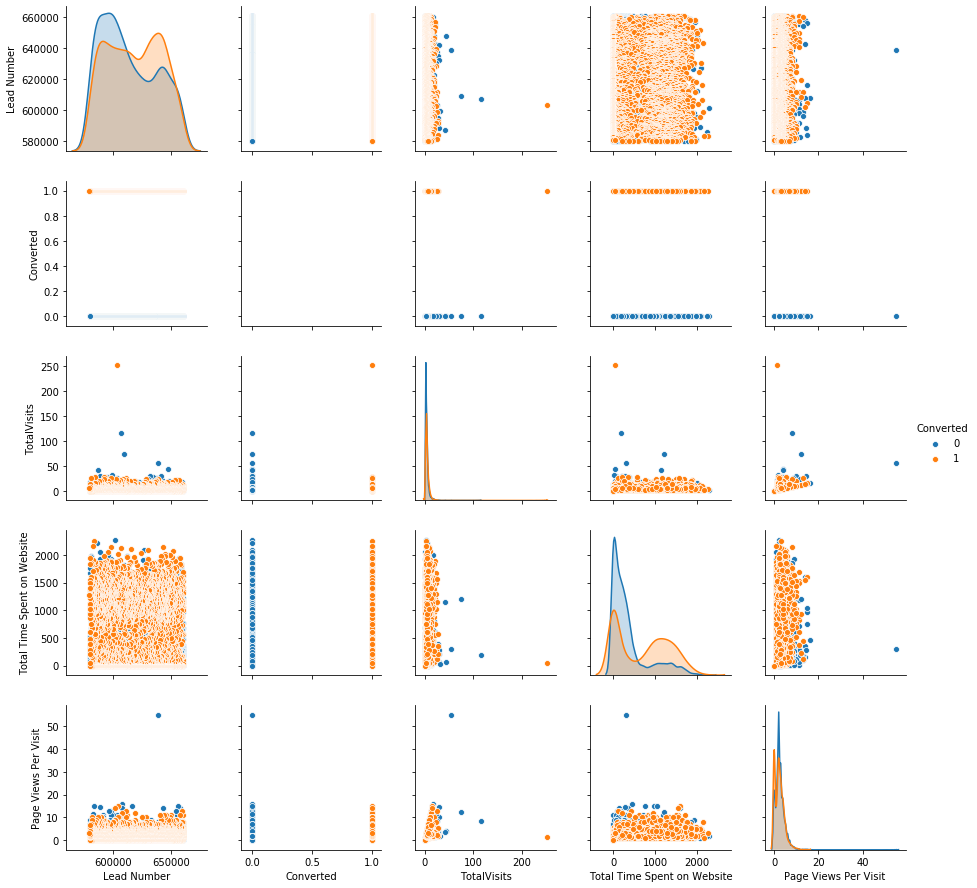

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(df1,hue='Converted')
plt.show()

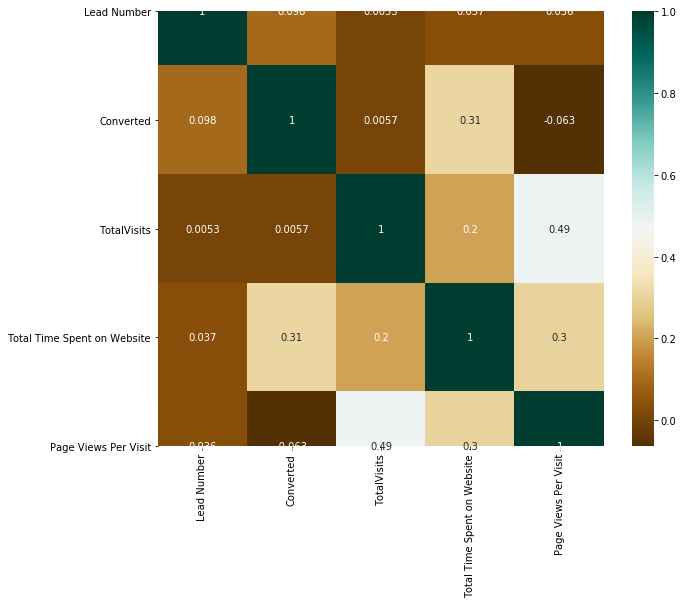

In [22]:
#Heatmap
plt.figure(figsize=(10,8))

sns.heatmap(df1.corr(), annot=True,cmap="BrBG")
plt.show()

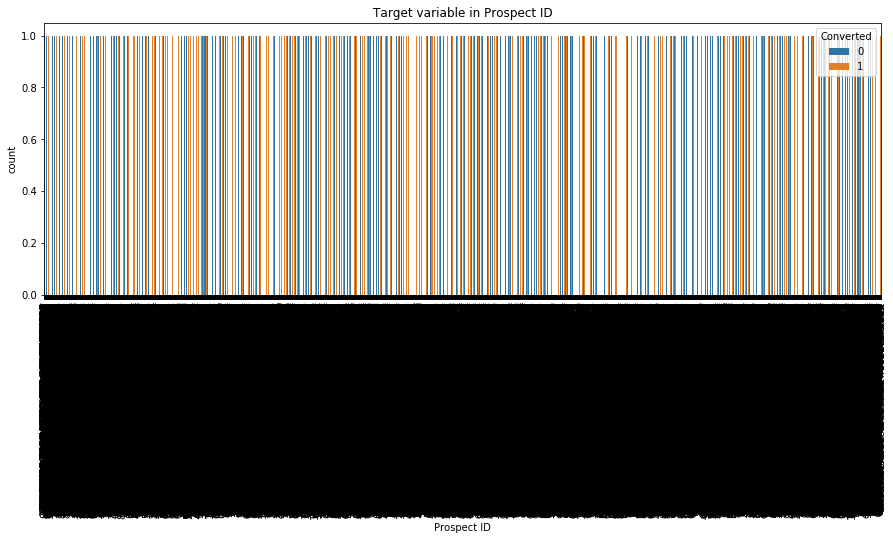

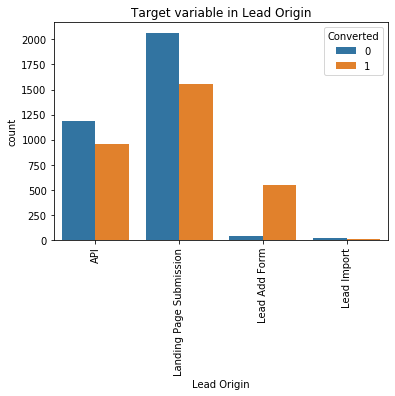

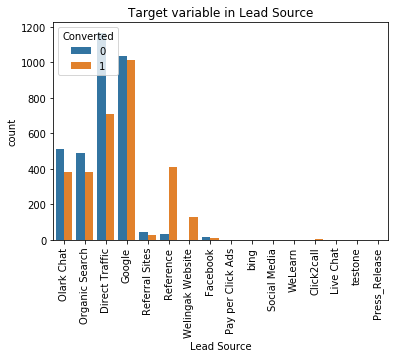

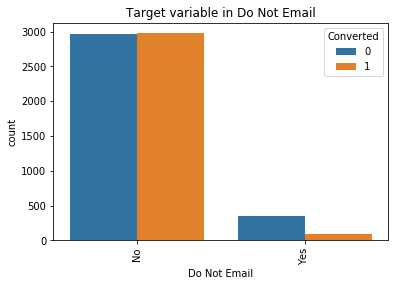

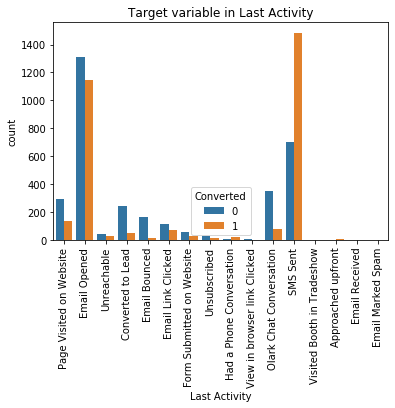

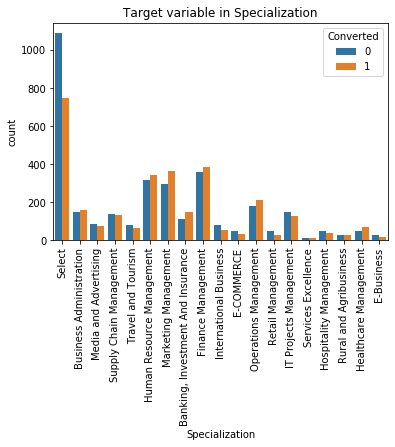

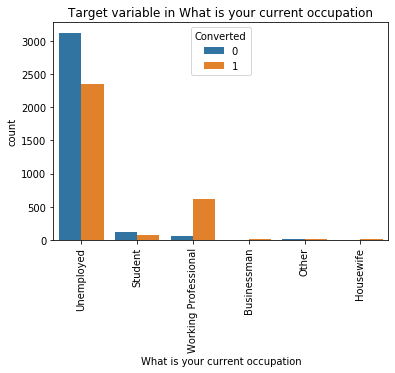

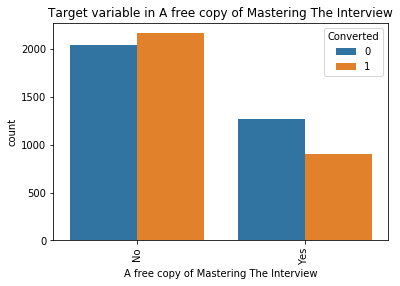

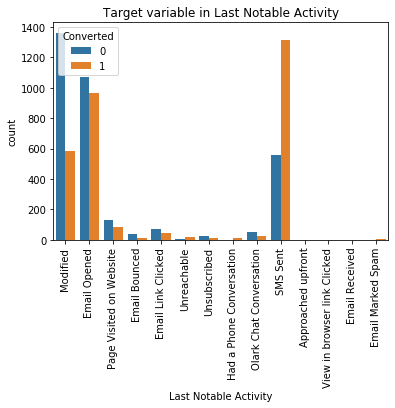

In [23]:
plt.figure(figsize =(15,5))
for i in (df1.columns):
    if df1[i].dtype == "object":
        sns.countplot(df1[i], hue=df1.Converted)
        plt.xticks(rotation = 90)
        plt.title('Target variable in'+' '+ i)
        plt.xlabel(i)
        plt.show()

In [24]:
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


#### From above plot, variables Prospect ID and Lead Number won't be of any use in the analysis, so it's best that we drop these two variables. 

In [25]:
# Dropping the "Prospect ID" and "Lead Number" 
df1.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [26]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [27]:
df1.shape

(6373, 12)

### 4. Data Preparation (Dummy Variable creation)

In [28]:
# List of column names whose dtype is object
for i in (df1.columns):
    if df1[i].dtype == "object":
        print(i)

Lead Origin
Lead Source
Do Not Email
Last Activity
Specialization
What is your current occupation
A free copy of Mastering The Interview
Last Notable Activity


In [29]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df1[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
df1 = pd.concat([df1, dummy], axis=1)

In [30]:
# Dropping the variables for which the dummy variables have been created

df1 = df1.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [31]:
df1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [32]:
df1.shape

(6373, 75)

### 5. Splitting Dataset into Training and Test Set

In [33]:
# Put all the feature variables in X and target variable in y

X = df1.drop(['Converted'], 1)

y = df1['Converted']

In [34]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [35]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [36]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 74)
y_train Size (4461,)


#### Scaling
Scaling the numeric variables present in the dataset using MinMax Scaler

In [38]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


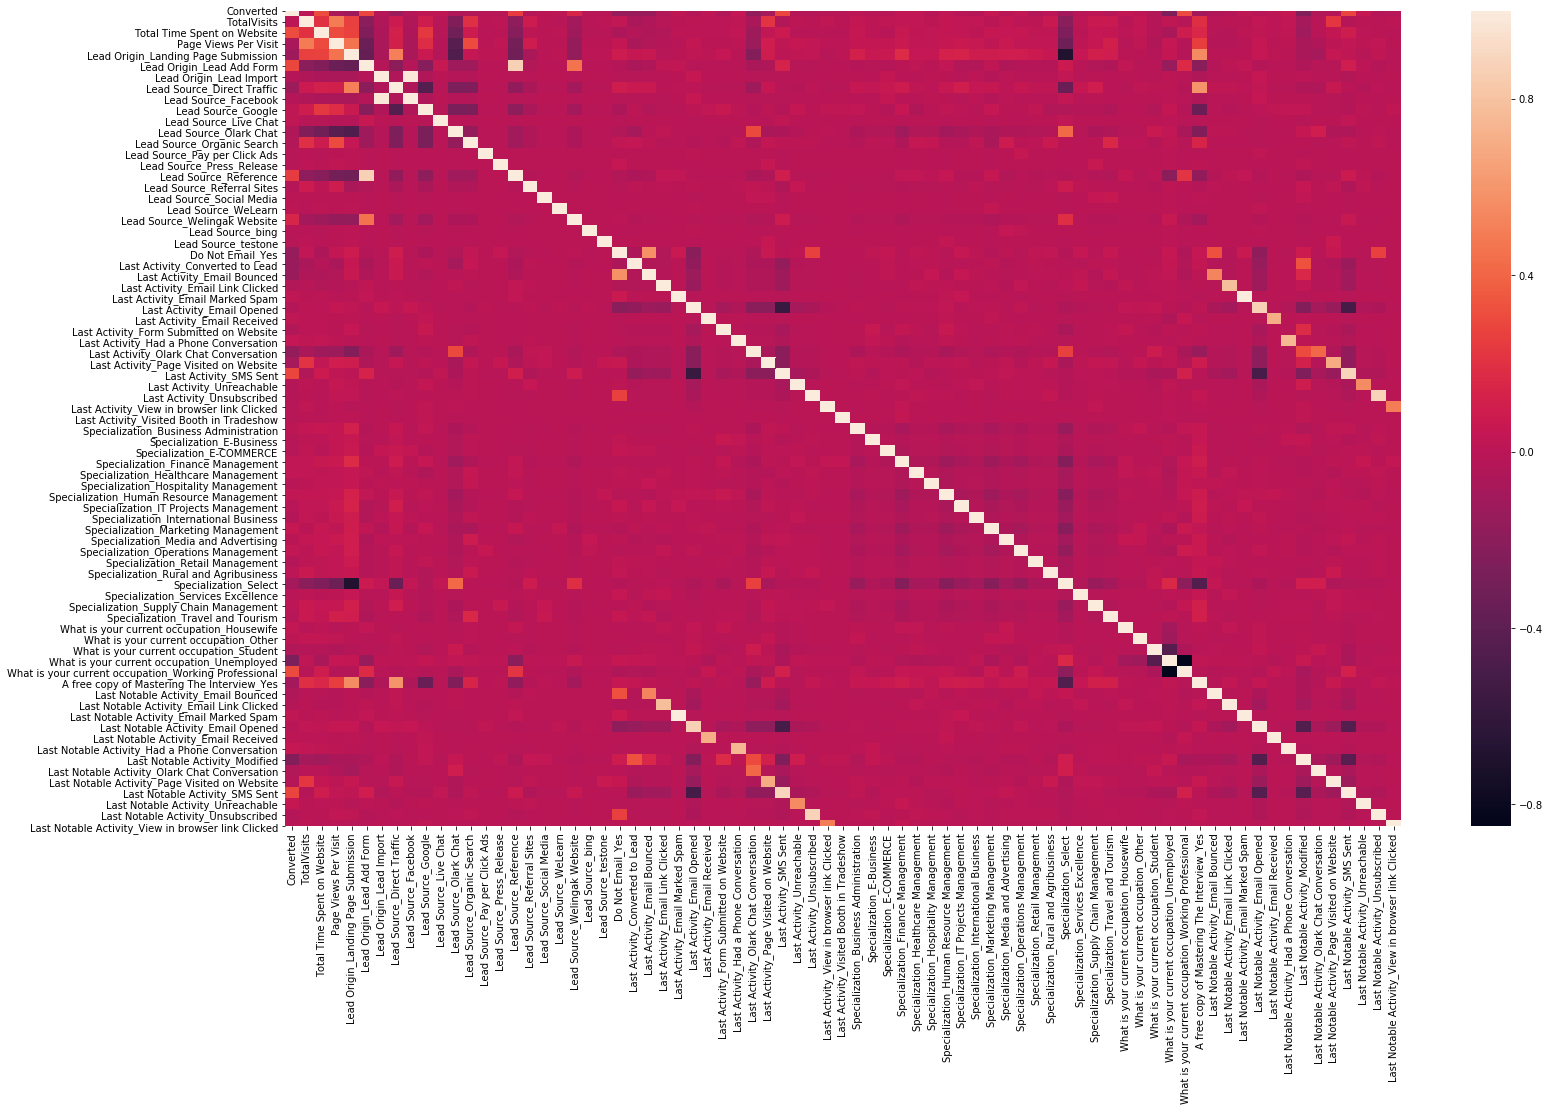

In [39]:
# correlation table
plt.figure(figsize = (25,15))
sns.heatmap(df1.corr())
plt.show()

### 6. Building Model

#### As  there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [40]:
# Creating a LogisticRegression object and running RFE with 15 variables as output
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [41]:
 # Ranking provided by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Source_Direct Traffic', False, 14),
 ('Lead Source_Facebook', False, 49),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Live Chat', False, 29),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Pay per Click Ads', False, 31),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 43),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 18),
 ('Lead Source_testone', False, 30),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 11),
 ('Last Activity_Email Bounced', False, 7),
 ('Last Activity_Email Link 

In [42]:
# selecting the variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Select', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


In [43]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [44]:
# Train set with RFE selected variables

X_train = X_train[col]

In [45]:
# Building 1st logical regression model

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2067.2
Date:                Thu, 14 Sep 2023   Deviance:                       4134.4
Time:                        01:49:50   Pearson chi2:                 4.83e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9490      0.603     -1.573      0.116      -2.131       0.233
TotalVisits                                             10.2343      2.636      3.882      0.000       5.068      15.401
Total Time Spent on Website                              4.4045      0.186     23.735      0.000       4.041       4.768
Lead Origin_Lead Add Form                                4.2361      0.259     16.363      0.000       3.729       4.744
Lead Source_Olark Chat                                   1.6324      0.133     12.267      0.000       1.372       1.893
Lead Source_Welingak Website                             2.3444      1.038      2.258      0.024       0.310       4.379
Do Not Email_Yes                                        -1.5177      0.192     -7.892      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation                   1.1713      0.987      1.186      0.235      -0.764       3.106
Last Activity_SMS Sent                                   1.1787      0.082     14.305      0.000       1.017       1.340
Specialization_Select                                   -0.3400      0.098     -3.464      0.001      -0.532      -0.148
What is your current occupation_Housewife               22.6104   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1260      0.634     -1.776      0.076      -2.369       0.117
What is your current occupation_Unemployed              -1.2968      0.598     -2.169      0.030      -2.468      -0.125
What is your current occupation_Working Professional     1.2483      0.627      1.992      0.046       0.020       2.476
Last Notable Activity_Had a Phone Conversation          23.0106   2.09e+04      0.001      0.999   -4.09e+04     4.1e+04
Last Notable Activity_Unreachable                        2.7670      0.807      3.429      0.001       1.186       4.348
========================================================================================================================
"""

In [46]:
calculateVIF(X_train)

,Features,VIF
11,What is your current occupation_Unemployed,4.13
6,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.39
8,Specialization_Select,1.90
2,Lead Origin_Lead Add Form,1.71
3,Lead Source_Olark Chat,1.66
0,TotalVisits,1.63
7,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


#### The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with Last Notable Activity_Had a Phone Conversation. 

In [47]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [48]:
# Building 2nd Logical regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.8
Date:                Thu, 14 Sep 2023   Deviance:                       4139.6
Time:                        01:51:03   Pearson chi2:                 4.84e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9489      0.603     -1.573      0.116      -2.131       0.233
TotalVisits                                             10.3097      2.639      3.907      0.000       5.138      15.481
Total Time Spent on Website                              4.3972      0.185     23.710      0.000       4.034       4.761
Lead Origin_Lead Add Form                                4.2368      0.259     16.365      0.000       3.729       4.744
Lead Source_Olark Chat                                   1.6359      0.133     12.290      0.000       1.375       1.897
Lead Source_Welingak Website                             2.3482      1.038      2.262      0.024       0.313       4.383
Do Not Email_Yes                                        -1.5182      0.192     -7.896      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation                   2.7613      0.800      3.452      0.001       1.193       4.329
Last Activity_SMS Sent                                   1.1786      0.082     14.307      0.000       1.017       1.340
Specialization_Select                                   -0.3472      0.098     -3.536      0.000      -0.540      -0.155
What is your current occupation_Housewife               21.6107   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1240      0.634     -1.773      0.076      -2.366       0.118
What is your current occupation_Unemployed              -1.2945      0.598     -2.166      0.030      -2.466      -0.123
What is your current occupation_Working Professional     1.2477      0.626      1.992      0.046       0.020       2.476
Last Notable Activity_Unreachable                        2.7659      0.807      3.428      0.001       1.185       4.347
========================================================================================================================
"""

In [49]:
calculateVIF(X_train)

,Features,VIF
11,What is your current occupation_Unemployed,4.13
1,Total Time Spent on Website,2.39
8,Specialization_Select,1.90
2,Lead Origin_Lead Add Form,1.71
3,Lead Source_Olark Chat,1.66
0,TotalVisits,1.63
7,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56
4,Lead Source_Welingak Website,1.37
10,What is your current occupation_Student,1.10


#### The VIFs are now all less than 5. So let's drop the ones with the high p-values - What is your current occupation_Housewife

In [50]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [51]:
# Building 3rd Logical regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.0
Date:                Thu, 14 Sep 2023   Deviance:                       4143.9
Time:                        01:52:09   Pearson chi2:                 4.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4009      0.556     -0.721      0.471      -1.491       0.689
TotalVisits                                             10.1186      2.624      3.856      0.000       4.975      15.262
Total Time Spent on Website                              4.3951      0.185     23.707      0.000       4.032       4.758
Lead Origin_Lead Add Form                                4.2345      0.259     16.363      0.000       3.727       4.742
Lead Source_Olark Chat                                   1.6319      0.133     12.268      0.000       1.371       1.893
Lead Source_Welingak Website                             2.3476      1.038      2.261      0.024       0.313       4.382
Do Not Email_Yes                                        -1.5207      0.192     -7.901      0.000      -1.898      -1.143
Last Activity_Had a Phone Conversation                   2.7626      0.800      3.454      0.001       1.195       4.330
Last Activity_SMS Sent                                   1.1783      0.082     14.305      0.000       1.017       1.340
Specialization_Select                                   -0.3488      0.098     -3.553      0.000      -0.541      -0.156
What is your current occupation_Student                 -1.6673      0.591     -2.821      0.005      -2.826      -0.509
What is your current occupation_Unemployed              -1.8376      0.552     -3.329      0.001      -2.920      -0.756
What is your current occupation_Working Professional     0.7040      0.583      1.208      0.227      -0.439       1.847
Last Notable Activity_Unreachable                        2.7623      0.807      3.422      0.001       1.180       4.345
========================================================================================================================
"""

In [53]:
calculateVIF(X_train)

,Features,VIF
10,What is your current occupation_Unemployed,4.11
1,Total Time Spent on Website,2.38
8,Specialization_Select,1.90
2,Lead Origin_Lead Add Form,1.70
3,Lead Source_Olark Chat,1.66
0,TotalVisits,1.63
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
4,Lead Source_Welingak Website,1.37
9,What is your current occupation_Student,1.10


#### Dropping 'What is your current occupation_Working Professional' as having high P value

In [54]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [55]:
# Building 4th Logical regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.6
Date:                Thu, 14 Sep 2023   Deviance:                       4145.3
Time:                        01:56:08   Pearson chi2:                 4.81e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2371      0.196      1.211      0.226      -0.147       0.621
TotalVisits                                   10.0121      2.618      3.825      0.000       4.882      15.143
Total Time Spent on Website                    4.3957      0.185     23.708      0.000       4.032       4.759
Lead Origin_Lead Add Form                      4.2341      0.259     16.364      0.000       3.727       4.741
Lead Source_Olark Chat                         1.6321      0.133     12.275      0.000       1.371       1.893
Lead Source_Welingak Website                   2.3468      1.038      2.260      0.024       0.312       4.382
Do Not Email_Yes                              -1.5182      0.192     -7.891      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation         2.7664      0.800      3.459      0.001       1.199       4.334
Last Activity_SMS Sent                         1.1815      0.082     14.361      0.000       1.020       1.343
Specialization_Select                         -0.3500      0.098     -3.565      0.000      -0.542      -0.158
What is your current occupation_Student       -2.3044      0.283     -8.155      0.000      -2.858      -1.751
What is your current occupation_Unemployed    -2.4751      0.187    -13.230      0.000      -2.842      -2.108
Last Notable Activity_Unreachable              2.7631      0.807      3.422      0.001       1.181       4.346
==============================================================================================================
"""

In [56]:
calculateVIF(X_train)

,Features,VIF
10,What is your current occupation_Unemployed,3.25
1,Total Time Spent on Website,2.01
8,Specialization_Select,1.90
3,Lead Source_Olark Chat,1.56
0,TotalVisits,1.55
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.46
4,Lead Source_Welingak Website,1.34
5,Do Not Email_Yes,1.08
9,What is your current occupation_Student,1.08


#### Both VIF and P Value looks good. We can use the 4th Model for Prediction

In [57]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.317060
218     0.152306
4171    0.136140
4037    0.277702
3660    0.959984
207     0.155001
2044    0.143021
6411    0.949236
6498    0.080049
2085    0.981888
dtype: float64

In [58]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31706043, 0.15230642, 0.13613956, 0.27770195, 0.95998364,
       0.1550006 , 0.14302095, 0.94923559, 0.08004927, 0.98188829])

In [59]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.317060
1,0,0.152306
2,1,0.136140
3,1,0.277702
4,1,0.959984


#### Creating new column 'Predicted' with 1 if Prob > 0.5 else 0
Here 0.5 is assumed value without any calculations made

In [60]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.317060,0
1,0,0.152306,0
2,1,0.136140,0
3,1,0.277702,0
4,1,0.959984,1


#### Evaluate the model 

In [61]:
#Creating the Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1925  387]
 [ 562 1587]]


In [62]:
# Overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7872674288276171


In [63]:
# Evaluate the other metrics 

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [64]:
#'Sensitivity'

TP/(TP+FN)

0.7384830153559795

In [65]:
#'Specificity'

TN/(TN+FP)

0.8326124567474048

### 7. Optimal Cutoff (Model Evaluation)

In [66]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [67]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob, drop_intermediate=False)

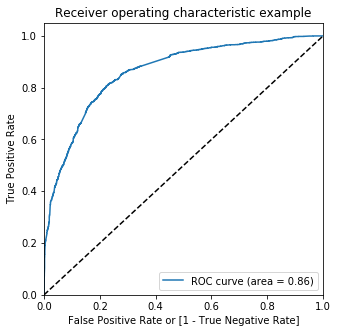

In [68]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### The area under the curve of the ROC is 0.86 which is good. So we seem to have a good model. Let's proceed to check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [69]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.317060,0,1,1,1,1,0,0,0,0,0,0
1,0,0.152306,0,1,1,0,0,0,0,0,0,0,0
2,1,0.136140,0,1,1,0,0,0,0,0,0,0,0
3,1,0.277702,0,1,1,1,0,0,0,0,0,0,0
4,1,0.959984,1,1,1,1,1,1,1,1,1,1,1


In [70]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.538444  0.993020  0.115917
0.2   0.2  0.695584  0.944625  0.464100
0.3   0.3  0.768662  0.875756  0.669118
0.4   0.4  0.790406  0.810610  0.771626
0.5   0.5  0.787267  0.738483  0.832612
0.6   0.6  0.761937  0.635644  0.879325
0.7   0.7  0.738624  0.548627  0.915225
0.8   0.8  0.708361  0.447650  0.950692
0.9   0.9  0.644250  0.281061  0.981834


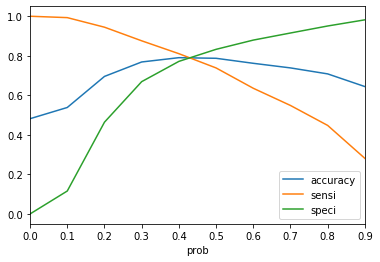

In [71]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From above graph, we can choose 0.42 as cutoff

In [72]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.317060,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.152306,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.136140,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.277702,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.959984,1,1,1,1,1,1,1,1,1,1,1,1


In [73]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

In [74]:
# Create the confusion matrix for new cut-off

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1810,  502],
       [ 437, 1712]], dtype=int64)

In [75]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [76]:
#'Sensitivity'

TP/(TP+FN)

0.796649604467194

In [77]:
#'Specificity'

TN/(TN+FP)

0.782871972318339

#### Prediction on Test Set

In [78]:
# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [79]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Select,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,1,0,1,0,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,0,0,1,0,0,0


In [80]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [81]:
# Dropping the required columns from X_test

X_test.drop(['What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], 1, 
                                inplace = True)

In [82]:
# Make predictions on the test set

y_test_pred = res.predict(sm.add_constant(X_test))

In [83]:
y_test_pred[:10]

4771    0.996504
6122    0.138112
9202    0.718136
6570    0.312323
2668    0.731056
4233    0.822362
3368    0.643642
9091    0.477191
5972    0.301264
3631    0.796722
dtype: float64

In [84]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4771,0.996504
6122,0.138112
9202,0.718136
6570,0.312323
2668,0.731056


In [85]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [86]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [87]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.996504
1,0,0.138112
2,0,0.718136
3,1,0.312323
4,1,0.731056


In [88]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996504
1,0,0.138112
2,0,0.718136
3,1,0.312323
4,1,0.731056


In [89]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996504,1
1,0,0.138112,0
2,0,0.718136,1
3,1,0.312323,0
4,1,0.731056,1


In [90]:
# Accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7855648535564853

In [91]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[780, 216],
       [194, 722]], dtype=int64)

In [92]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [93]:
# 'Sensitivity'
TP / float(TP+FN)

0.7882096069868996

In [94]:
# 'Specificity'
TN / float(TN+FP)

0.7831325301204819

### 8. Precision-Recall View (Model Evaluation) 

In [95]:
#Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1925,  387],
       [ 562, 1587]], dtype=int64)

#### Precision = TP / TP + FP
Recall =TP / TP + FN

In [96]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8039513677811551

In [97]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7384830153559795

#### Precision and recall tradeoff

In [98]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

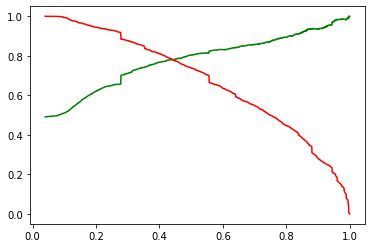

In [99]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Here the cutoff is 0.44 

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.317060,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.152306,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.136140,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.277702,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.959984,1,1,1,1,1,1,1,1,1,1,1,1


In [101]:
# Accuracy`

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

In [102]:
# Confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1839,  473],
       [ 466, 1683]], dtype=int64)

In [103]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
#Precision
TP/(TP+FP)

0.7806122448979592

In [105]:
#Recall
TP/(TP+FN)

0.7831549557933922

#### Now lets take cut off as 0.44 and make predictions based on tat for Test set

In [106]:
# Making predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996504,1
1,0,0.138112,0
2,0,0.718136,1
3,1,0.312323,0
4,1,0.731056,1


In [107]:
# Accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7897489539748954

In [108]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[799, 197],
       [205, 711]], dtype=int64)

In [109]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [110]:
#Precision

TP/(TP+FP)

0.7830396475770925

In [111]:
#Recall

TP/(TP+FN)

0.7762008733624454

#### TakeAways
1. For both Optimal and Precision Evaluation Method Accuracy is 78%
2. The consistency in Evaluation values gives confidence on the Model
3. Variables - 'TotalVisits', 'Total Time Spent on Website','Lead Origin_Lead Add Form', 'Lead Source_Olark Chat','Lead Source_Welingak Website' are directly proportional to the model performance